# Track Times Code

In [204]:
# Data Description - The data is csv files of multiple track events for male and female athletes
# Each file has the top 1,000 performances for that event for 2019 in the state of Pennsylvania
# This file cleans the data and produces box and whisker plots and histograms for every event

# 1) Loading Packages

In [58]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
import re

%matplotlib inline 

# 2) Functions for data normalization and graphing

In [102]:
# Function 1 - removeLeadingZeros
# Remove leading zeros due to data format of website

def removeLeadingZeros(str):
    regex = "^0+(?!$)"
    str = re.sub(regex, "", str) 
    return str


# Function 2 - secondsConversion 
# Convert strings of min and seconds to seconds
# e.g. 1:06.32 becomes 66.32
# Any value less than 60 seconds stays the same
# Or convert empty strings to zero

def secondsConversion(x):
    if x == '': #replace empty string with zero
        return 0
    
    elif ':' in x: #convert m:ss format to seconds
        mins, secs = map(float, re.split(':|,\.', x))
        td = timedelta(minutes=mins, seconds=secs)
        return td.total_seconds()

    else: 
        return float(x)
    
    
# Function 3 - feetConversion    
# convert ft and inches to inches
# e.g. convert 19-0.5 to 228.5

def feetConversion(valueToConvert):
    if '-' in valueToConvert:
        feet, inches = map(float, re.split('-', valueToConvert))
        inches = inches/12
        finalFeet = feet + inches
    
    else:
        finalFeet = 0
        

    return finalFeet

# Function 3 - bestPerformancePositions
# calculate positions for graphs
# returns list of bestFemalePerformance2019, maleTop25Percentile2019, bestFemaleRankingInBoys2019

def bestPerformancePositions(analysisColumnName, femaleData, maleData):
    bestFemalePerformance2019 = femaleDF[analysisColumnName][0]
    
    if analysisColumnName == 'Time (s)': #the lower the time, the better the performance
        maleTop25Percentile2019 = maleDF[analysisColumnName].quantile(0.75)
        bestFemaleRankingInBoys2019 = maleDF[analysisColumnName][maleDF[analysisColumnName] < bestFemalePerformance2019]
    
    else: #analysisColumnName is 'MARK', since the longer the distance the better the performance
        maleTop25Percentile2019 = maleDF[analysisColumnName].quantile(0.25)
        bestFemaleRankingInBoys2019 = maleDF[analysisColumnName][maleDF[analysisColumnName] > bestFemalePerformance2019]
    
    #best female ranking in boys compares the best female performance to all boys performances
    bestFemaleRankingInBoys2019 = bestFemaleRankingInBoys2019.shape[0]
    
        
    return [bestFemalePerformance2019, maleTop25Percentile2019, bestFemaleRankingInBoys2019]
   

# 3) Loading the Data Files

In [103]:
## Example 1 - Time Based data: Girl's 1600m Race

testData1 = pd.read_csv(r'outdoorF1600m.csv', encoding= 'unicode_escape')
testData1.head()

,RANK,TIME,ATHLETE/TEAM,GRADE,MEET DATEPLACE
0,1,04:37.07,TARYN PARKSGreencastle-Antrim,2020.0,"PIAA T&F State Championships1stMay 24, 2019 - ..."
1,2,04:37.45,MARLEE STARLIPERNorthern,2020.0,"PIAA T&F State Championships2ndMay 24, 2019 - ..."
2,3,04:45.27,GRACE FORBESStrath Haven,2019.0,"Girls DELCO Championship1stMay 2, 2019 - May 4..."
3,4,04:48.79,MELISSA RIGGINSShady Side Academy,2021.0,"46th Annual Baldwin Invitational1stMay 3, 2019"
4,5,04:53.45,GWYNETH YOUNGCedar Crest,2021.0,"PIAA District 3 AAA Championships3rdMay 17, 20..."


In [104]:
## Example 2 - Length Based: Girls Discus Throw

testData2 = pd.read_csv(r'outdoorFDiscus.csv', encoding= 'unicode_escape')
testData2.head()

,RANK,MARK,ATHLETE/TEAM,GRADE,MEET DATEPLACE
0,1,160-6,MALLORY KAUFFMANGreenwood,2019,"Susquenita vs Greenwood1stApr 30, 2019"
1,2,153-11,MACKENNA ORIEHempfield Area (7),2019,"Greater Latrobe @ Hempfield Area1st FApr 16, 2019"
2,3,152-7,SINIRU IHEOMACouncil Rock South,2021,"PIAA District 1 AAA Championships1stMay 17, 20..."
3,4,149-6,MAURA HUWALTSouth Park High School,2019,"The Penn Relays Carnival5thApr 25, 2019 - Apr ..."
4,5,146-10,MARIA DEAVIZSouderton Area,2020,14th Annual Hoka One One Henderson Invitationa...


In [105]:
# Create gender and event lists to build a loop to load data
genderList = ['M', 'F']
eventList = ['100m','200m','400m','800m','1600m','3200m','Discus','HighJump',
       'Javelin','LongJump','ShotPut','TripleJump']


# Female state records (best of all time) in a dict to compare to 2019 data
femaleStateRecords = {'100m':11.25, '200m': 22.95, '100mH':12.95, 
                      '400m': 52.82, '300mH':41.10,
                     '800m': 120.07, '1600m':277.07, '3200m':594.75,
                     '300mH':41.10, 'Discus':feetConversion('169-2') , 
                      'HighJump':feetConversion('6-1'),
                     'Javelin':feetConversion('185-8'), 'LongJump':feetConversion('20-8.5'),
                      'ShotPut':feetConversion('53-0.25'),'TripleJump':feetConversion('42-3.75')}


# 4) Create 'for' loops to clean data

11.75


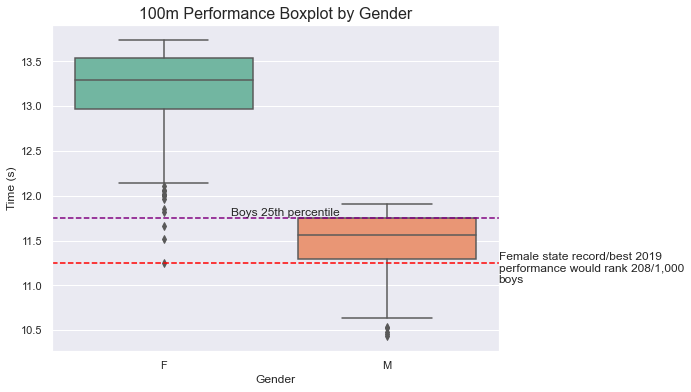

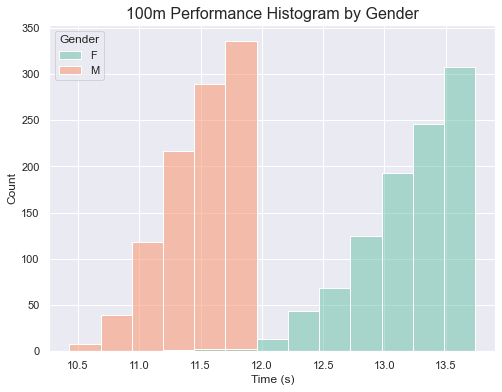


 
 
 

24.0


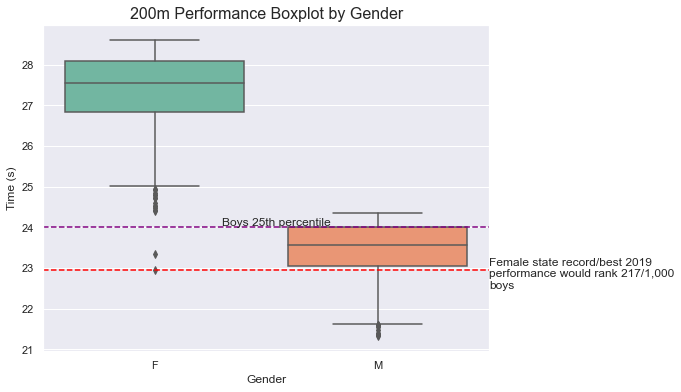

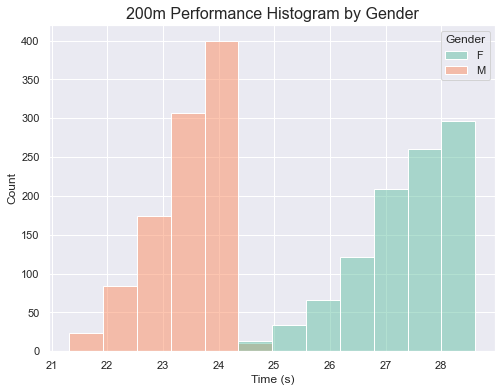


 
 
 

54.41


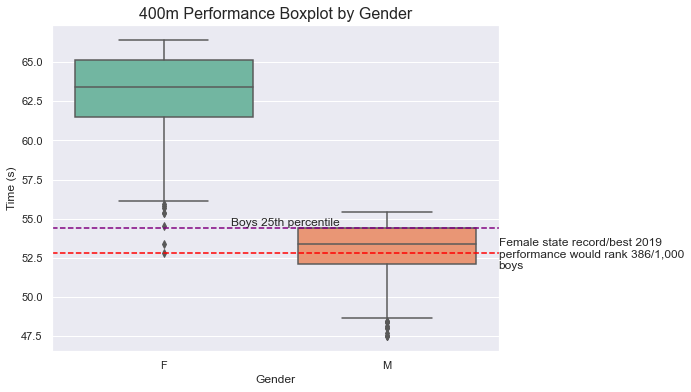

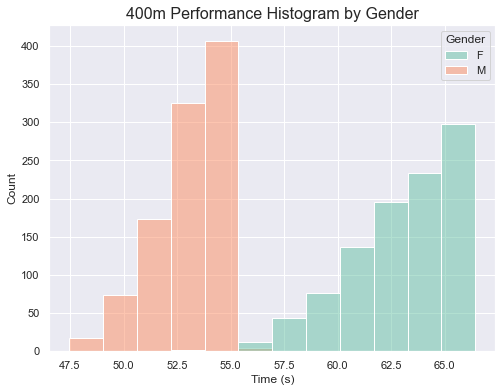


 
 
 

128.98


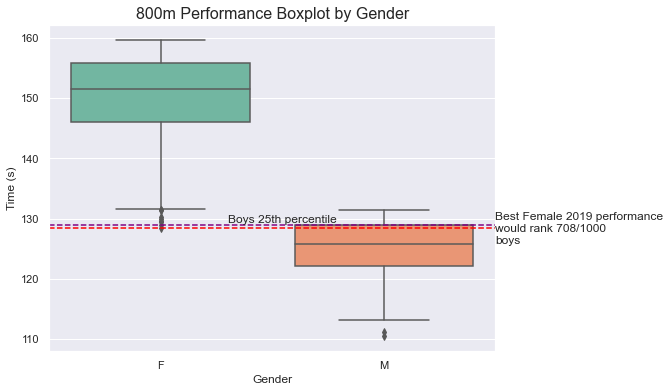

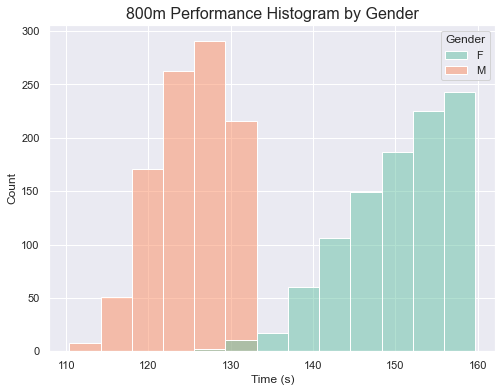


 
 
 

291.31


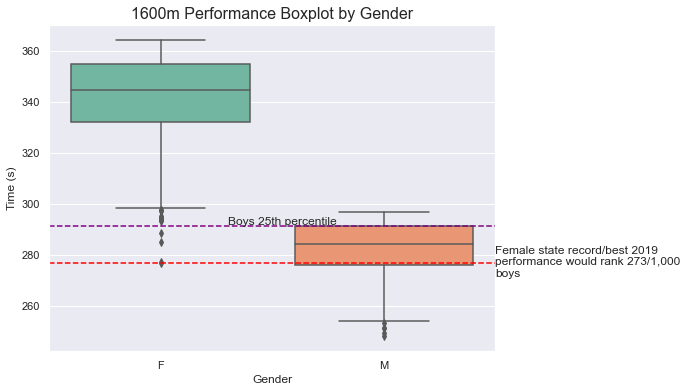

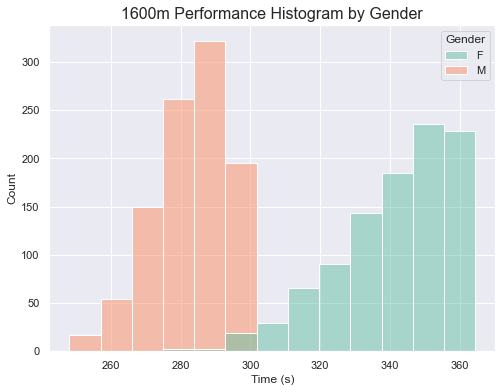


 
 
 

654.685


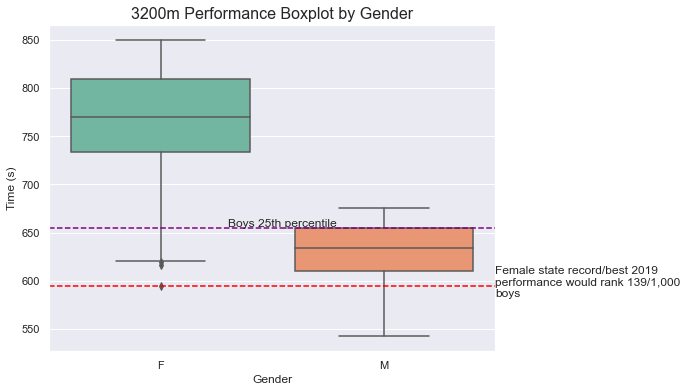

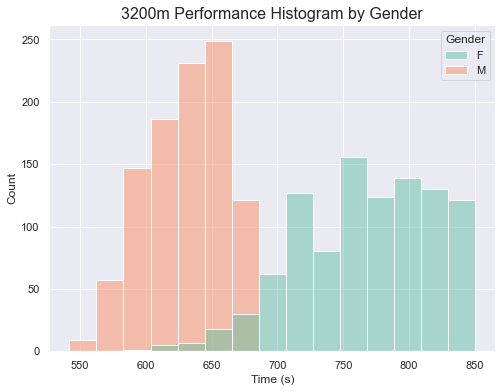


 
 
 

103.66666666666667


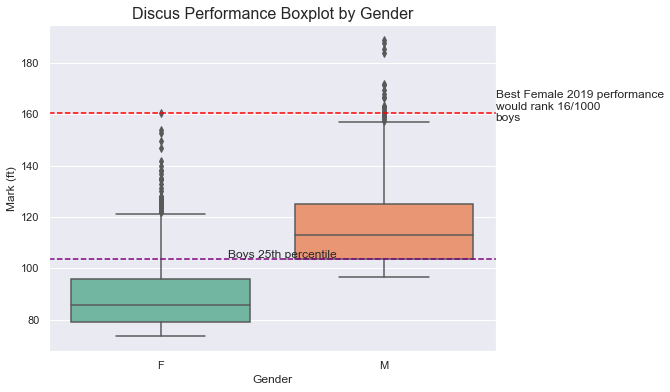

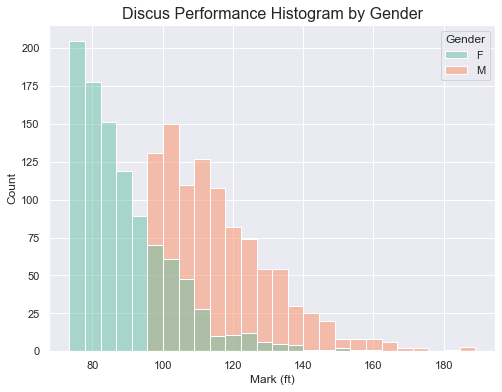


 
 
 

5.333333333333333


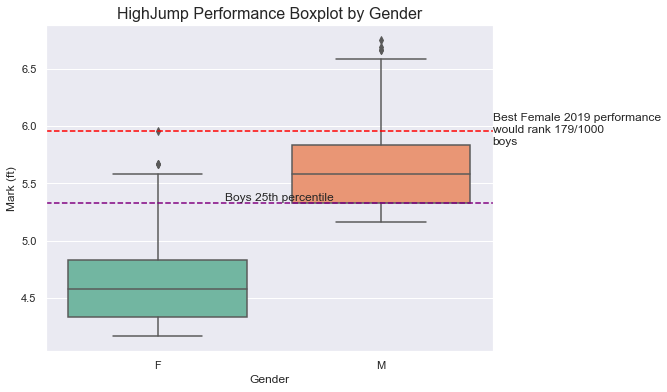

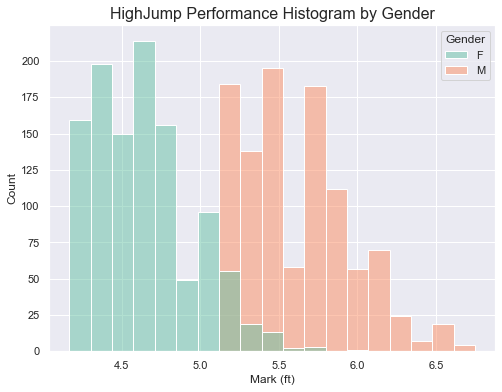


 
 
 

123.25


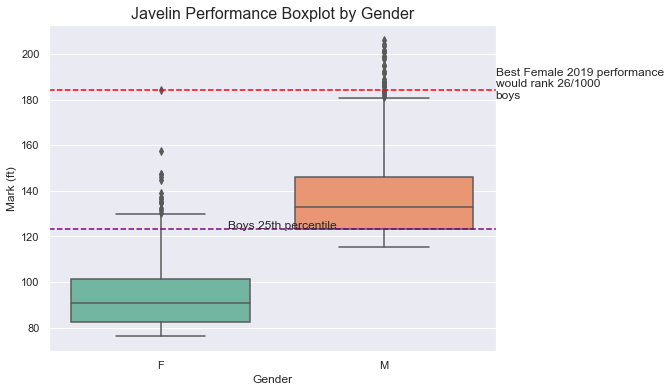

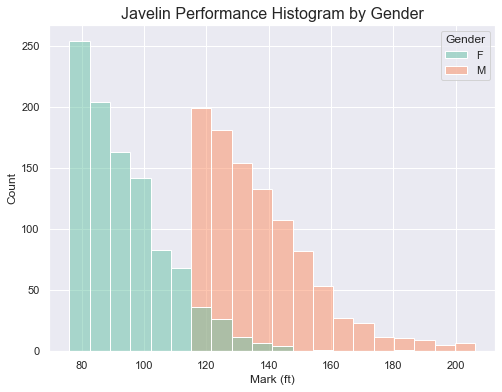


 
 
 

18.958333333333332


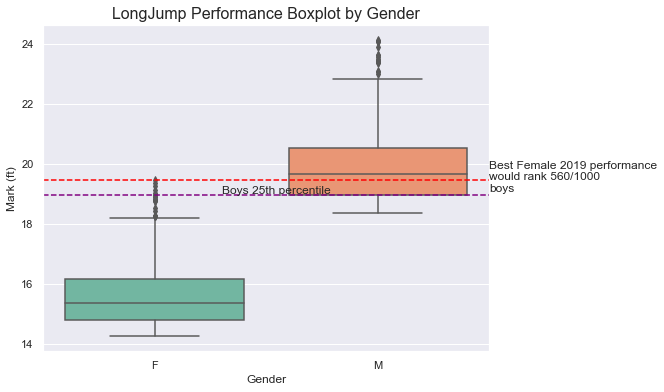

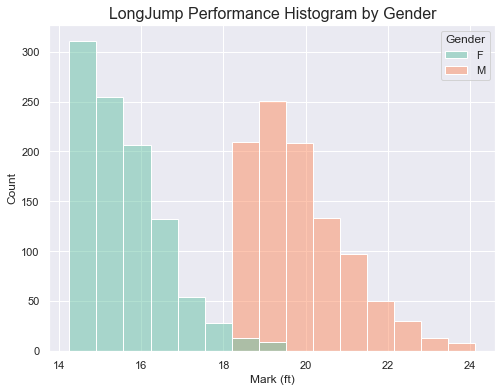


 
 
 

37.619791666666664


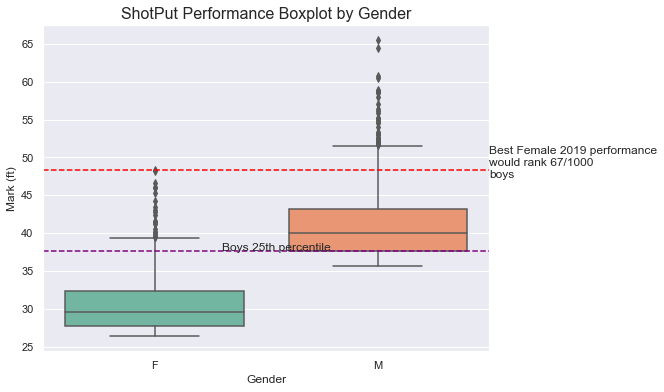

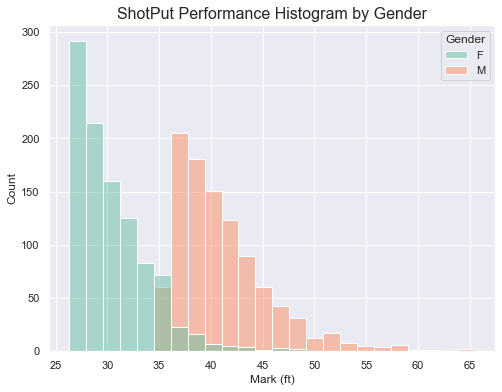


 
 
 

37.583333333333336


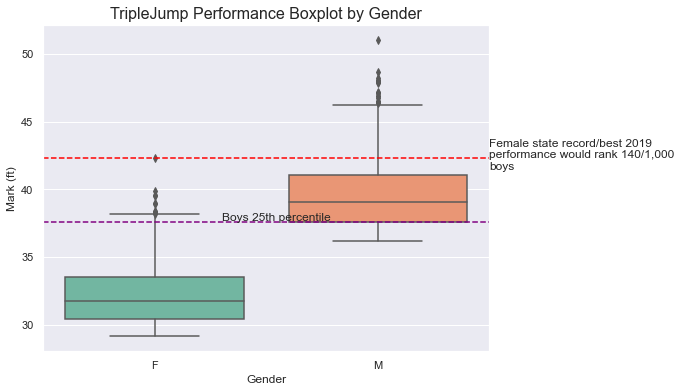

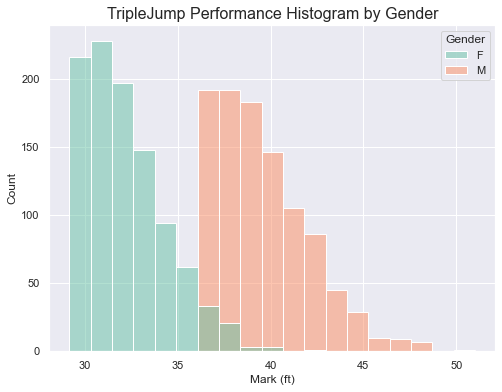

In [106]:
for event in eventList:
    femaleDF = pd.read_csv(r'outdoorF{eventName}.csv'.format(eventName = event), encoding= 'unicode_escape')
    maleDF = pd.read_csv(r'outdoorM{eventName}.csv'.format(eventName = event), encoding= 'unicode_escape')
    
    # Set analysis column variable to either Time or Mark (length in feet) based on column value in the Female dataset
    # This determines how the data gets cleaned
    if femaleDF.columns[1] == 'TIME':
        analysisColumn = 'TIME'
    else:
        analysisColumn = 'MARK'
    
    dfList = [maleDF, femaleDF] 
    
    for df in dfList:
        #clean up data: convert to string, removeLeadingZeros, replace any extra text
        df[analysisColumn] = df[analysisColumn].astype('str')    
        df[analysisColumn] = df[analysisColumn].apply(lambda x: removeLeadingZeros(x))
        
        df[analysisColumn] = df[analysisColumn].apply(lambda x: x.lower())
        df[analysisColumn] = df[analysisColumn].dropna(axis=0)
        
        if analysisColumn == 'TIME': #clean up data if it is a time
            df[analysisColumn] = df[analysisColumn].replace(to_replace ='\s|[a-z]', value = '', regex = True)
            df[analysisColumn] = df[analysisColumn].apply(lambda x: secondsConversion(x))
            df.rename(columns = {'TIME': 'Time (s)'}, inplace=True) #clean up graph axes
            analysisColumnFinal = 'Time (s)'
                    
        else: #clean up Mark type data 
            df[analysisColumn] = df[analysisColumn].apply(lambda x: feetConversion(x))
            df.rename(columns = {'MARK': 'Mark (ft)'}, inplace=True) #clean up graph axes
            analysisColumnFinal = 'Mark (ft)'
                    
        df[analysisColumnFinal] = df[analysisColumnFinal].astype('float') #convert to float type
        df = df[df[analysisColumnFinal] > 0] #remove zeros from dataset
        #end for loop
  
    #define Gender column   
    femaleDF['Gender'] = 'F'
    maleDF['Gender'] = 'M'
    
    #combine male and female data together into a single dataframe
    finalDF = pd.concat([femaleDF[[analysisColumnFinal, 'Gender']], maleDF[[analysisColumnFinal, 'Gender']]])
    finalDF = finalDF[finalDF[analysisColumnFinal] > 0]

    #create boxplot using Seaborn library
    sns.set(rc={'figure.figsize':(8,6)})
    ax = sns.boxplot(x="Gender", y=analysisColumnFinal, data=finalDF, palette ="Set2")
    graphTitle = event + " Performance Boxplot by Gender"
    ax.set_title(graphTitle, fontsize=16)
    
    #use bestPerformancePositions to set position of markers on box plot
    #create variables to set markers on the graph that compares key metrics such as top female
    
    bestFemalePerformance2019 = bestPerformancePositions(analysisColumnFinal, femaleDF['Gender'], maleDF['Gender'])[0]
    maleTop25Percentile2019 = bestPerformancePositions(analysisColumnFinal, femaleDF['Gender'], maleDF['Gender'])[1]
    bestFemaleRankingInBoys2019 = bestPerformancePositions(analysisColumnFinal, femaleDF['Gender'], maleDF['Gender'])[2]
   
    textPosition1 = bestFemalePerformance2019-0.02*bestFemalePerformance2019 #set good text position for the writing
    ax.axhline(bestFemalePerformance2019, ls='--', color = "red")
   
    if bestFemalePerformance2019 == femaleStateRecords[event]: #if female state record is the same as best 2019 performance
        ax.text(1.5, textPosition1, 
                "Female state record/best 2019" + "\n" + "performance would rank " + str(bestFemaleRankingInBoys2019) + 
                "/1,000" +"\n" + "boys")
        
    else: #if female state record is not the same as 2019 perforamnce
        ax.text(1.5, textPosition1, 
                "Best Female 2019 performance" + "\n" + "would rank " + str(bestFemaleRankingInBoys2019) + 
                "/1000" + "\n" + "boys")
    print(maleTop25Percentile2019)
    textPosition2 = maleTop25Percentile2019 + 0.002*maleTop25Percentile2019
    ax.axhline(maleTop25Percentile2019, ls='--', color = 'purple')
    ax.text(.3, textPosition2, "Boys 25th percentile") 
    plt.show()
    
    print('\n \n') 
    
    #plot histogram to compare gender performance
    ax2 = sns.histplot(data = finalDF, x=analysisColumnFinal, hue='Gender', palette ="Set2")
    graphTitle2 = event + " Performance Histogram by Gender"
    ax2.set_title(graphTitle2, fontsize=16)
    
    plt.show()
    print('\n \n \n \n') #separate graphs from different track events with spacing
    
    
    
   